In [26]:
import torch
import numpy as np
import pandas as pd
bounds = np.asarray([(0.0, 87.0), (0.0,11.0)]).T 
import matplotlib.pyplot as plt

In [27]:
TARGET_SHAPE = "triangle"

In [28]:
traj = torch.load("./retrosynthesis/%s/optim_traj.pkl"%TARGET_SHAPE, map_location=torch.device('cpu'))
spectra = np.load("./data/spectra_8.npy")
if TARGET_SHAPE=="sphere":
    spectra_measured = spectra[:8,:]
else:
    spectra_measured = spectra[8:,:]


In [29]:
comps = traj["X_traj"][:,-1,:]
target_x = traj["target_x"].squeeze()
if TARGET_SHAPE=="sphere":
    target_y = traj["target_y"]
else:
    fdtd = np.load("../FDTD/triangle_fdtd.npz")
    target_y = torch.from_numpy(fdtd["y"])

In [30]:
def min_max_scale(y):
    return (y-min(y))/(max(y)-min(y))
def unscale_wavelength(wl, limits=[400, 900]):
    return wl*(limits[1]-limits[0]) + limits[0]

In [31]:
wavelength = np.load("./data/wav.npy")
t_measured = min_max_scale(wavelength)

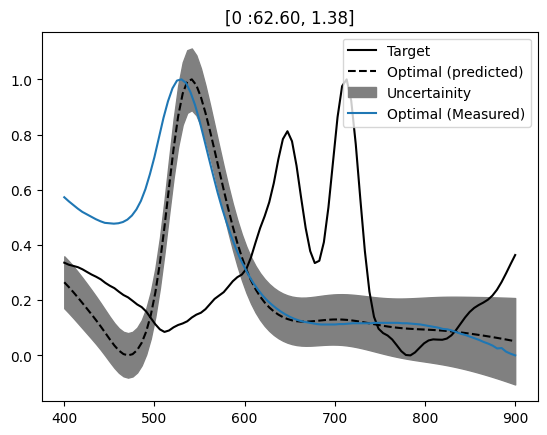

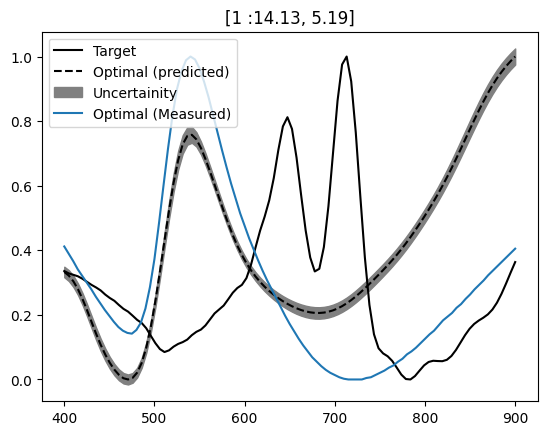

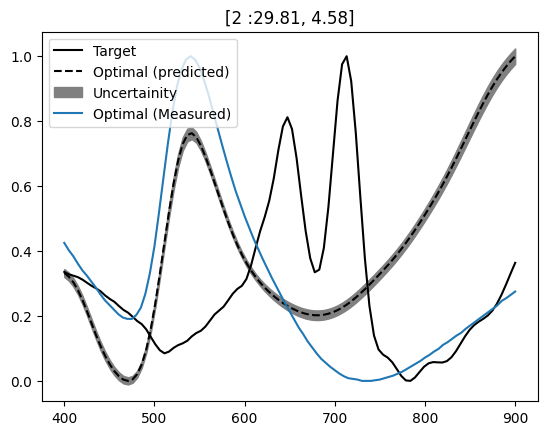

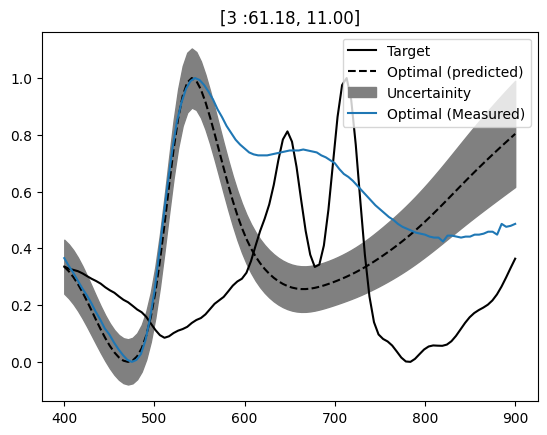

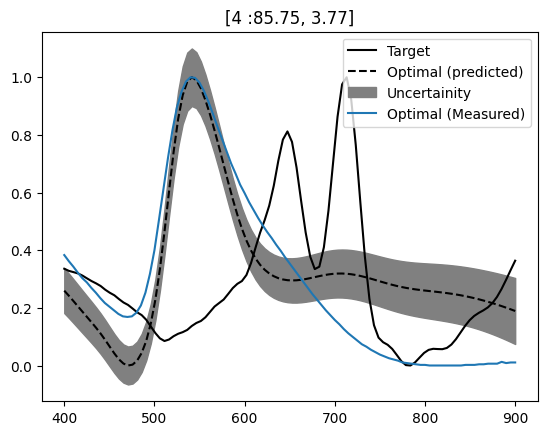

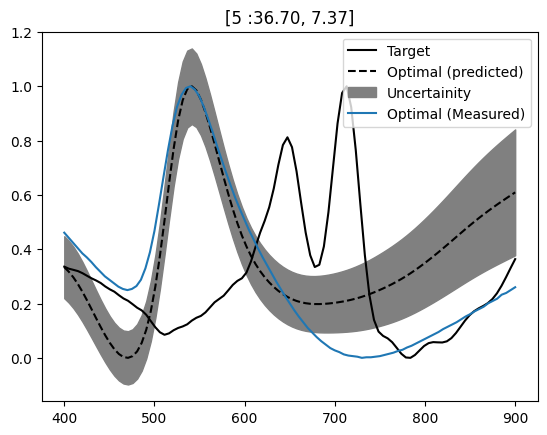

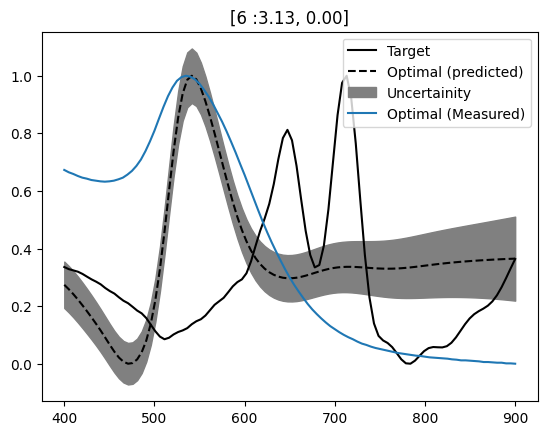

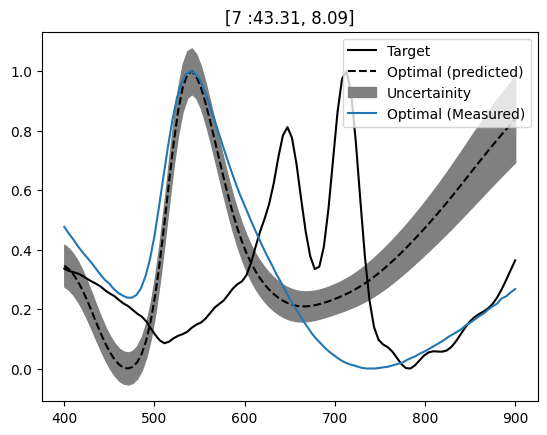

In [32]:
for i in range(comps.shape[0]):
    fig, ax = plt.subplots()
    optim_spectra = traj["spectra"][i,...]
    mu = min_max_scale(optim_spectra[:,0].numpy())
    sigma = optim_spectra[:,1].numpy()
    ax.plot(unscale_wavelength(target_x), min_max_scale(target_y.squeeze().numpy()), c="k", label="Target")
    ax.plot(unscale_wavelength(target_x), mu, c="k", ls="--", label="Optimal (predicted)")
    ax.fill_between(unscale_wavelength(target_x),
                mu-sigma, 
                mu+sigma, 
                color='grey',
                label="Uncertainity"
                )
    ax.plot(wavelength, min_max_scale(spectra_measured[i,:]), label="Optimal (Measured)")
    ax.set_title("[%d :%.2f, %.2f]"%(i, comps[i,0], comps[i,1]))
    ax.legend()
    plt.show()
    

In [33]:
# np.savez("./retrosynthesis/triangle_expt_retrosynth.npz", x = wavelength, y= spectra_measured[7,:])